<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании. Задача разработь такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns

In [16]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except: 
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [18]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Можно возраст и зарплату привести к int. И так как максимальное число- 79000, можно привести весь датасет к int32

In [19]:
data = data.astype('int32')

In [20]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int32
 1   Возраст            5000 non-null   int32
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int32
 4   Страховые выплаты  5000 non-null   int32
dtypes: int32(5)
memory usage: 97.8 KB


In [26]:
97.8/195.4 *100

50.051177072671436

Датасет небольшой, но снижение использования памяти практически на 50% может существенно сказаться на скорости обработки данных на больших объемах памяти

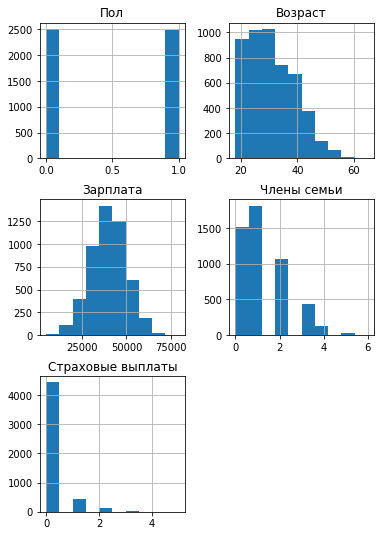

In [6]:
data.hist(figsize=(6,9));

Аномалий в данных не наблюдается

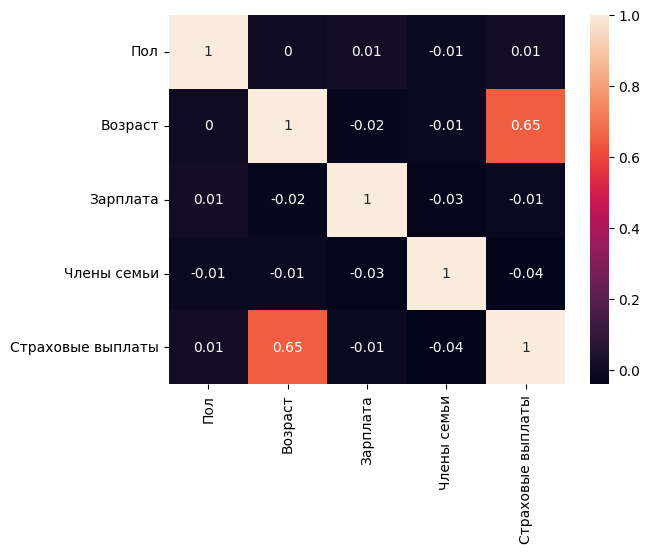

In [27]:
sns.heatmap(data.corr().round(2), annot=True);

Наблюдается высокая корреляция между возрастом и страховыми выплатами - в обычной жизни часто возраст также имеет достаточное значение для страховых компаний

In [8]:
data['Страховые выплаты'].sum() / data['Страховые выплаты'].count() * 100

14.799999999999999

Общее количество страховых выплат 14.8% 

Показатель того, что таргет не сбалансирован

In [9]:
X = data.drop('Страховые выплаты', axis=1)
y = data['Страховые выплаты']

In [10]:
X.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [11]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(3750, 4)

(1250, 4)

(3750,)

(1250,)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
r2 = r2_score(y_test, predict)
r2

0.4254778540696319

Были исследован датасет, проведена небольшая предобработка (не было пропусков и аномальных значений, на которые следовало бы обратить внимание)
Так же разделены данные на тренировочную и тестовую выборки и получена метрика R2 на не закодированных данных. 

Далее проведем кодирование, обучим модель на зашифрованных данных и сравним метрики

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество предсказаний модели линейной регрессии не изменится 

**Обоснование:** Для корректного умножения признаков на матрицу должна быть соблюдена размерость - ширина первой матрицы
А $(𝑚×𝑛)$ равна высоте второй матрицы В $(𝑛×r)$. Тогда размер произведения этих матриц будет $m×r$. Одно из условий- матрица, на которую будем производить умножение должна быть обратимой - то есть быть квадратной и иметь не нулевой определитель

Цель: доказать, что $a = a_p$ ($X_w$ = $PXw_p$)

Подставим значения из формулы обучения



Подставим вместо параметра w, формулу её вычисления: $X_i w=X_i(X^T X)^{−1}XTy$

Упростим формулу используя принцип ассоциативности $(A(BC)=(AB)C)$ и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке $((AB)T=BTAT)$:

$w = (X^T X)^{-1} X^T y$

$ w' = ((XP)^T XP)^{-1} (XP)^T y $


$w' = (P^T (X^T X) P)^{-1} (XP)^T y $= 
$(P^T (X^T X) P)^{-1} P^T X^T y $= 
$(X^TX)^{-1}(P^TP)^{-1}P^T X^T y $= 
$(X^TX)^{-1}P^{-1} (P^T)^{-1}P^T X^T y $=
$(X^TX)^{-1}P^{-1} X^T y$ 
Следовательно $w' = P^-1 w$

## Алгоритм преобразования

**Алгоритм**

1. Необходимо проверить матрицу, на которую будем производить умножение на обратимость
2. Разделить данные на обучающую и тестовую выборки для обучения модели
3. Создать обратимую матрицу
4. Произвести умножение обучающих признаков на матрицу
5. Сравнить метрики на исходных данных и на зашифрованных

**Обоснование**

Качество линейной регрессии будет одинаковым до и после преобразования данных. Преобразование данных не влияет на способность модели предсказывать целевой признак

## Проверка алгоритма

R2 я на исходных признаках я рассчитал чуть выше, теперь создам матрицу, на которую будем умножать признаки и после произведем умножение

In [15]:
num = X.shape[1]
matrix = np.random.randint(1,10, (num,num))

In [16]:
np.linalg.inv(matrix) #проверка матрицы на обратимость


array([[ 0.14967462, -0.29609544,  0.32863341, -0.1670282 ],
       [-0.12147505, -0.04229935,  0.18980477, -0.02386117],
       [-0.00867679,  0.10412148, -0.23644252,  0.21258134],
       [ 0.01952278,  0.26572668, -0.21800434,  0.02169197]])

In [17]:
new_features = X @ matrix

In [18]:
new_features.head()

,0,1,2,3
0,297776.0,397053.0,248137.0,297937.0
1,228189.0,304282.0,190147.0,228371.0
2,126116.0,168174.0,105087.0,126232.0
3,250294.0,333738.0,208581.0,250374.0
4,156719.0,208969.0,130589.0,156830.0


Преобразование прошло успешно, признаки зашифрованы. Теперь проверим, изменился ли R2

In [19]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_features, y, test_size=0.25, random_state=42)

In [20]:
model.fit(X_train_new, y_train_new)
predict_new = model.predict(X_test_new)
r2_new = r2_score(y_test_new, predict_new)
r2_new

0.4254778540696591

In [21]:
print('R2 на исходных данных:', r2)
print('R2 на зашифрованных данных:', r2_new)

R2 на исходных данных: 0.4254778540696319
R2 на зашифрованных данных: 0.4254778540696591


Вывод: 
Данные были загружены и проанализированы

Был разработан алгоритм преобразования данных

По алгоритму были зашифрованы данные

После обучения модели на исходных и зашифрованных данных метрика не изменилась

Общий итог: Качество линейной регресии не изменилось после умножения исходной матрицы на обратимую